In [1]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import Lambda
from diagrams.aws.storage import S3
from diagrams.aws.network import APIGateway
from diagrams.aws.database import Dynamodb
from diagrams.generic.device import Tablet

from diagrams.aws.integration import SNS
from diagrams.onprem.vcs import Github
from diagrams.aws.devtools import Codebuild
from diagrams.aws.devtools import Codepipeline
from diagrams.aws.devtools import Codestar
from diagrams.aws.business import Workmail as Mail

import warnings
warnings.filterwarnings('ignore')

In [2]:
graph_attr = {
    "fontsize": "20",
    "labelfontsize": "20",
    "bgcolor": "transparent"
}

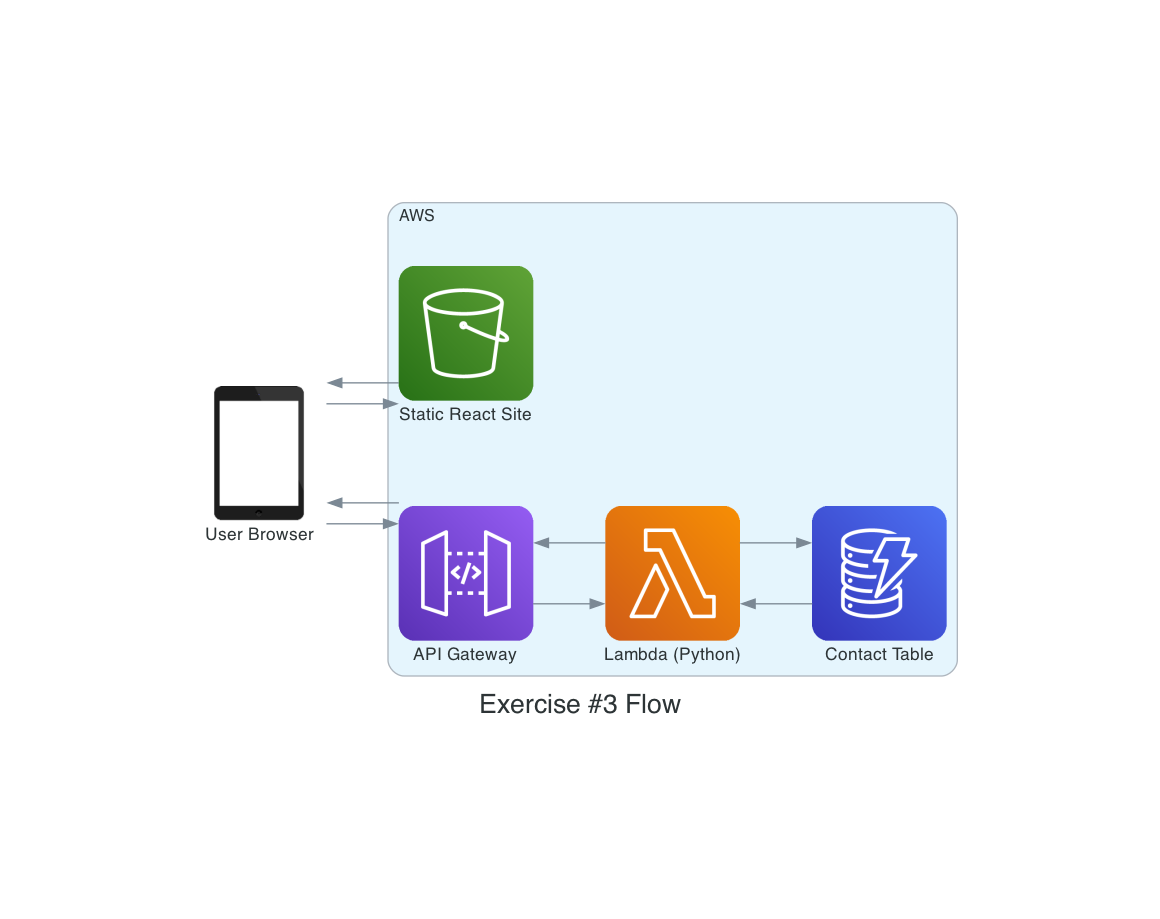

In [3]:
with Diagram("Exercise #3 Flow", show=False, graph_attr=graph_attr, filename="ex3") as diag:
    source = Tablet("User Browser")
    with Cluster("AWS"):
        static = S3("Static React Site")
        api = APIGateway("API Gateway")
        lambdafn= Lambda("Lambda (Python)")
        dynamo = Dynamodb("Contact Table")
    source >> static
    static >> source
    api >> source
    source >> api 
    api >> lambdafn
    lambdafn >> api
    lambdafn >> dynamo
    dynamo >> lambdafn

diag

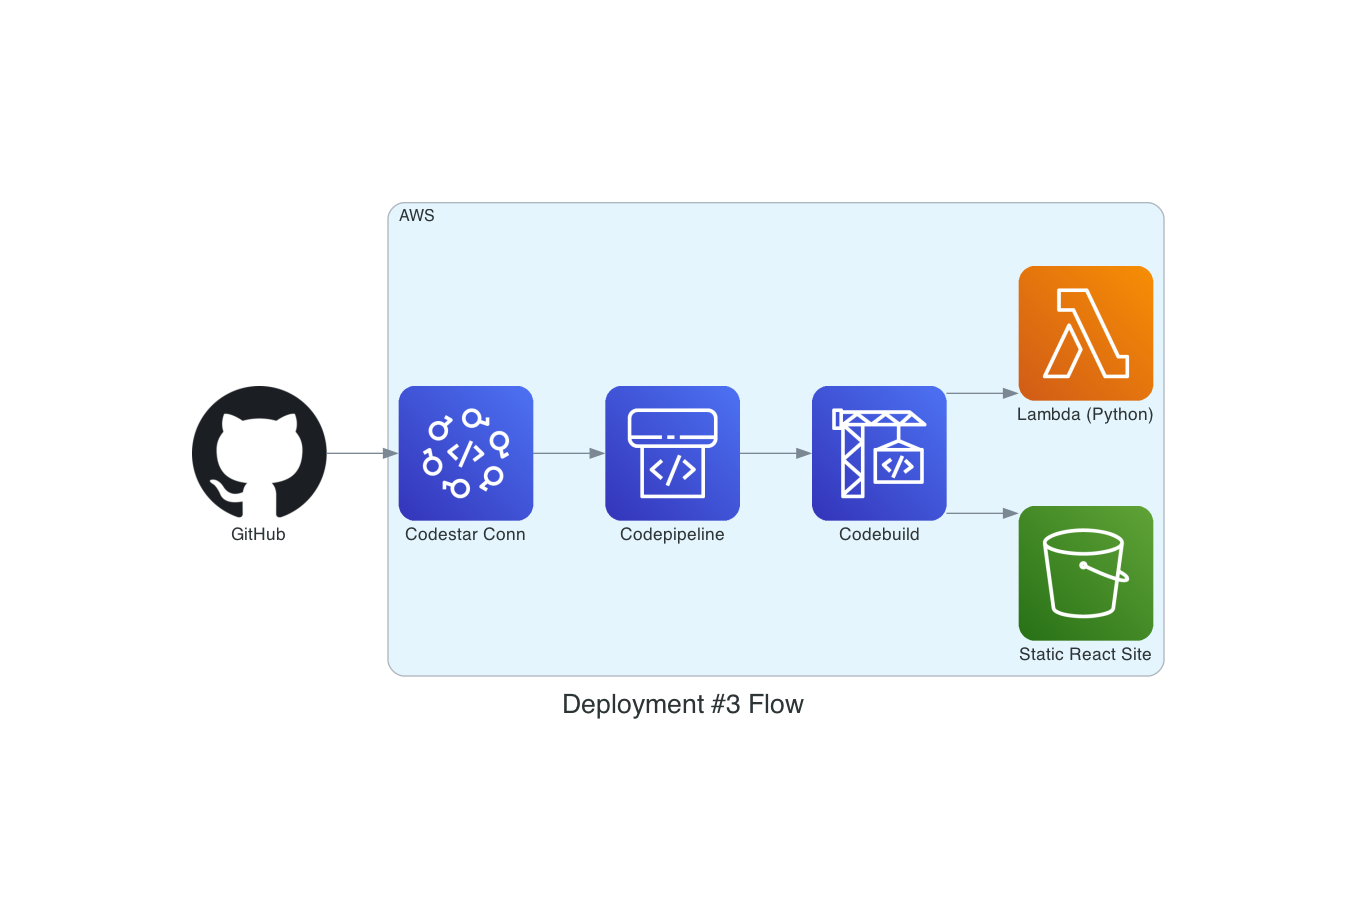

In [4]:
with Diagram("Deployment #3 Flow", show=False, graph_attr=graph_attr, filename="ex3deploy") as diag:
    git = Github("GitHub")
    with Cluster("AWS"):
        codestar = Codestar("Codestar Conn")
        pipe = Codepipeline("Codepipeline")
        builder= Codebuild("Codebuild")
        
        static = S3("Static React Site")
        lambdafn= Lambda("Lambda (Python)")
        
        git >> codestar >> pipe >> builder
        builder >> static
        builder >> lambdafn
diag

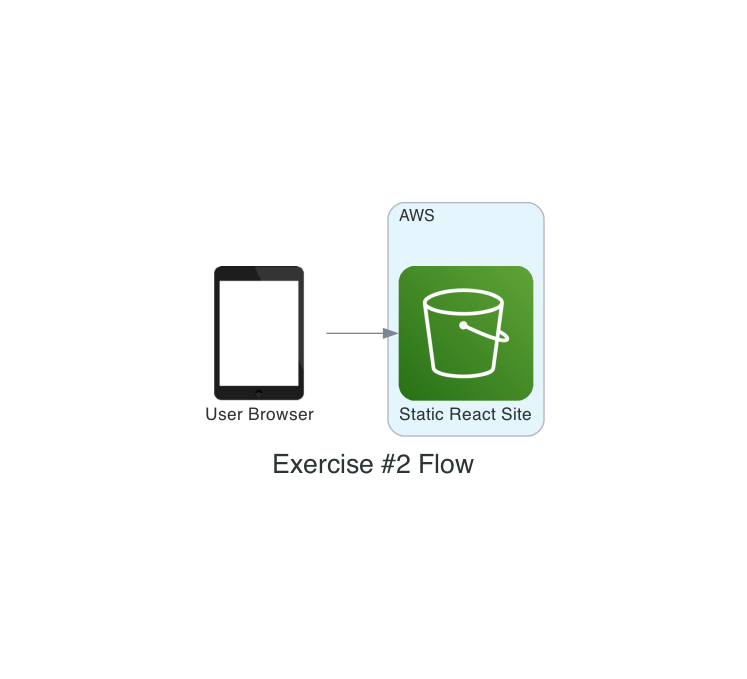

In [8]:
with Diagram("Exercise #2 Flow", show=False, graph_attr=graph_attr, filename="ex2") as diag:
    source = Tablet("User Browser")
    with Cluster("AWS"):
        static = S3("Static React Site")
    source >> static

diag

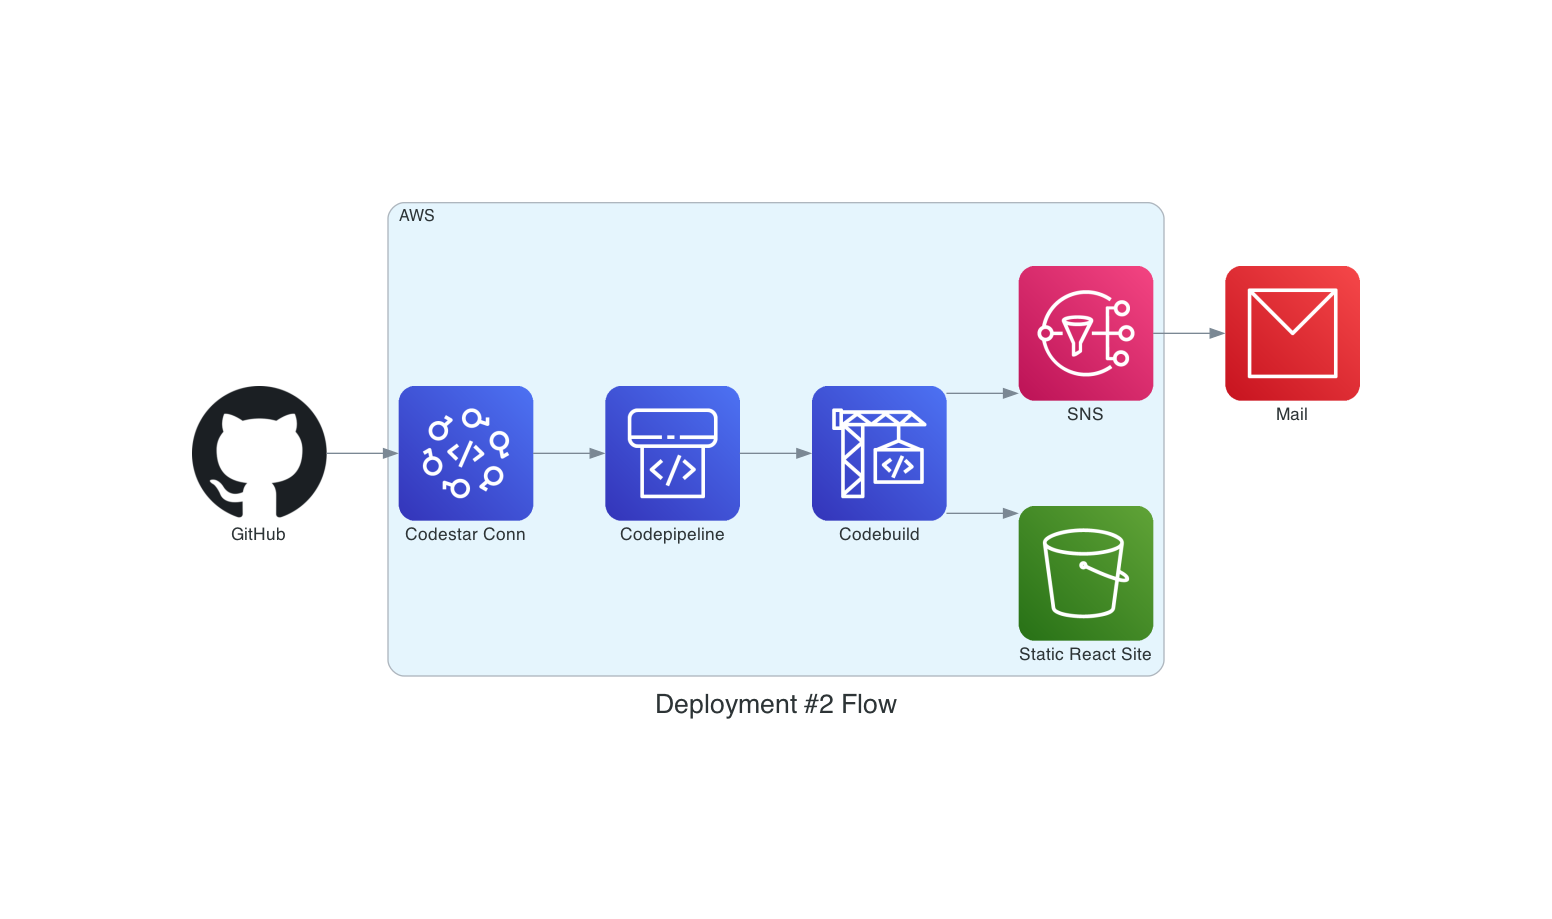

In [6]:
with Diagram("Deployment #2 Flow", show=False, graph_attr=graph_attr, filename="ex2deploy") as diag:
    git = Github("GitHub")
    mail=Mail("Mail")
    with Cluster("AWS"):
        codestar = Codestar("Codestar Conn")
        pipe = Codepipeline("Codepipeline")
        builder= Codebuild("Codebuild")
        
        static = S3("Static React Site")
        sns= SNS("SNS")
        
        
        git >> codestar >> pipe >> builder
        builder >> static
        builder >> sns
    sns >> mail
diag

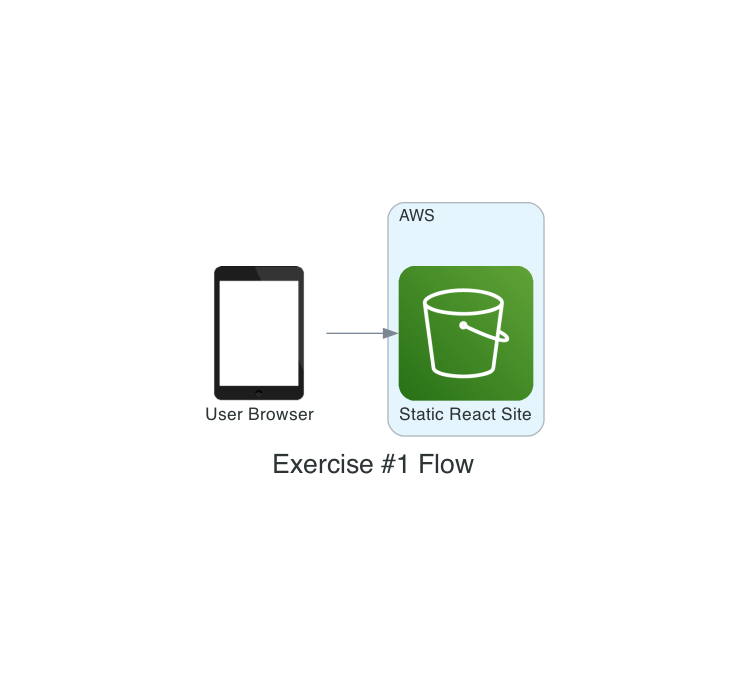

In [7]:
with Diagram("Exercise #1 Flow", show=False, graph_attr=graph_attr, filename="ex1") as diag:
    source = Tablet("User Browser")
    with Cluster("AWS"):
        static = S3("Static React Site")
    source >> static

diag